# Chapter 9: Support Vector Machines
+ "New" learning method invented by Vladamir Vapnik in the 1990's. 
+ Likely best classifier at its time, now surpassed by gradient boosted trees and neural networks.

Three different but very closely related classifiers:
* Maximal margin classifier
* Support Vector classifier
* Support vector machine

## Maximal Margin Classifier
### Hyperplane
+ An optimal hyperplane that separates classes.  
+ **Hyperplane** - For any p dimensional space, it is a p-1 dimensional flat surface. 
+ A line in 2 dimensions, a plane in three dimensions. 
+ Mathematical definition in p dimensions: $\beta_0 + \beta_1 X_1 + ... + \beta_p X_p = 0$. 
+ It divides whatever your dimension is into two pieces.




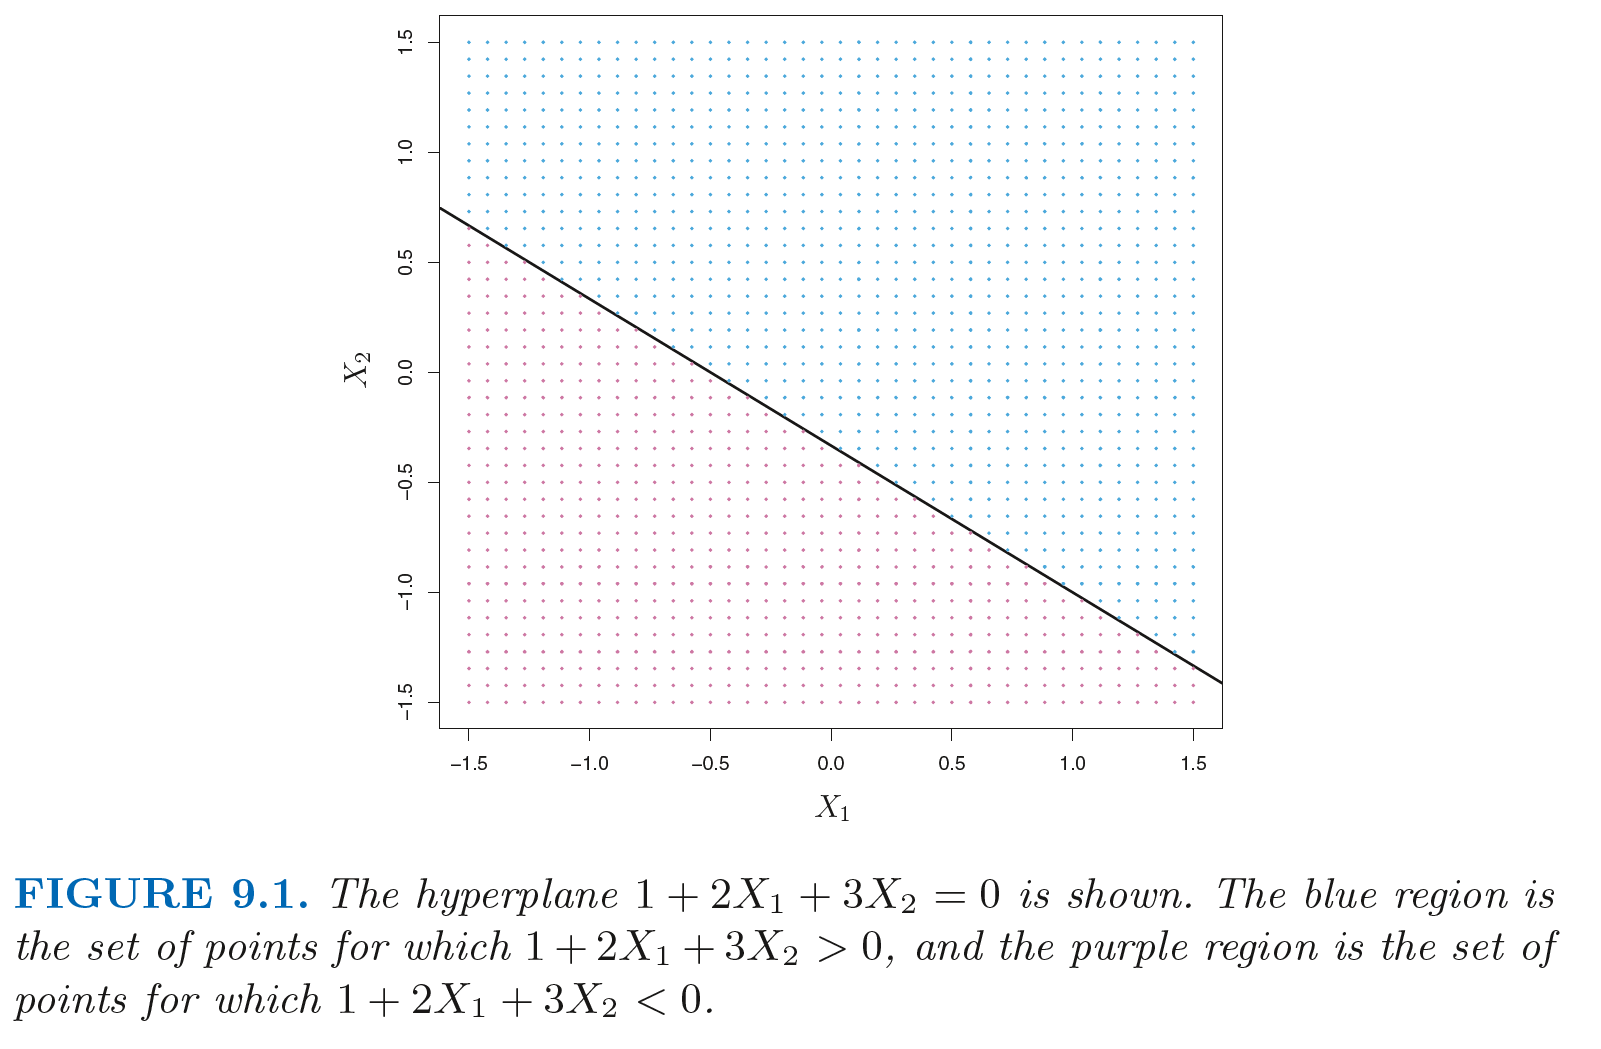

In [1]:
from IPython.display import Image
Image('images/pw91.png', width =700)

In [ ]:
Image('images/pw92.png', width =700)

### Classification Using a Separating Hyperplane
+ Suppose we have  a $n \times p$ data matrix $\textbf{X}$
$$x_1 = \left[\begin{array}{c} x_{11} \\ \vdots \\ x_{1p} \end{array} \right], \; \ldots, \; x_n = \left[\begin{array}{c} x_{n1} \\ \vdots \\ x_{np} \end{array} \right]$$
and these observations fall into two classes, $y_1, \ldots, y_n \in \left\{-1,1\right\}$.
+ This approach is based upon the concept of **separating hyperplane**.
+ Consider the left hand panel in Fig 9.2, where the separating hyperplane has the property
$$\begin{eqnarray} \beta_0 + \beta_1x_{i1}+ \ldots + \beta_px_{ip} > 0 & \textrm{ if } & y_i=1 \\
  \beta_0 + \beta_1x_{i1}+ \ldots + \beta_px_{ip} < 0 & \textrm{ if } & y_i=-1 \end{eqnarray}$$
+ Multiplying both equations by $y_i$ yields $y_i(\beta_0 + \beta_1x_{i1}+ \ldots + \beta_px_{ip}) > 0$ for any correctly classified observation.
+ A test observation, $x^*$, can be classified based on the sign of $f(x^*)$ (positive (class 1) or negative (class -1)).
+ The magnitude of $f(x^*)$ can be used to measure how confident we are about the class assignment for $x^*$.

### The maximal margin classifier
+ If the data is perfectly separable then an infinite number of hyperplanes will exist that can perfectly separate the data. 
+ A natural choice is to choose a hyperplane that maximizes the distance from each observation (training) to the hyperplane - one that has a large margin - the maximum margin.

### What defines maximum margin?
+ In the linearly separable case we find the line that has the maximum margin between the two classes. 
+ The maximum margin is defined as the distance of the closet point to the separating hyperplane. 
+ So, we are maximizing the minimum distance from the hyperplane. 
+ All other points are of no consequence which is a bit scary but it happens to work well. 
+ These minimum distance points are called the **support vectors**.

In [ ]:
Image('images/pw93.png', width =600)

### Contruction of the Maximal Margin Classifier
+ Set of training observations, $x_1, \ldots, x_n \in \mathbb{R}^p$
+ Associated class labels, $y_1, \ldots, y_n \in \left\{ -1, 1 \right\}$
+ The maximal margin hyperplane is the solution to:
$$    \max_{\beta_0, \ldots, \beta_p, M}{M} $$
$$   \textrm{subject to } \sum_{j=1}^p{\beta_j^2} = 1 $$
$$   y_i(\beta_0 + \beta_1 x_{i1} + \ldots + \beta_p x_{ip}) \geq M \quad \forall i=1, \ldots, n $$
   where $M$ is the width of the margin.





In [ ]:
Image('images/pw94.png', width =700)

## Support Vector Classifiers
+ If the data is not linearly separable then no hyperplane can separate the data and thus no margin can exist. 
+ This case is most common with real data. 
+ The maximum margin classifier is very sensitive to single data points. 
+ The hyperplane can change drastically with the addition of one new data point. 
+ To help combat this type of overfitting and to allow for non-separable classification we can use a soft margin. 
+ We allow some observation to be on the wrong side of the hyperplane or within the margin. 
+ This margin violation makes the margin 'soft'.
+ This will provide:
    + Greater robustness to individual observations
    + Better classification of most of the training observations
+ Also known as **soft margin classifier**


In [ ]:
Image('images/pw95.png', width =700)

In [ ]:
Image('images/pw96.png', width =700)

+ The hyperplane is chosen to correctly separate most of the training observations into the two classes, but may misclassify a few observations.
+ The problem formulation is tweaked such that we allow for some total amount of error, C. 
$$    \max_{\beta_0, \ldots, \beta_p, \epsilon_1, \ldots , \epsilon_n M}{M} $$
$$   \textrm{subject to } \sum_{j=1}^p{\beta_j^2} = 1 $$
$$   y_i(\beta_0 + \beta_1 x_{i1} + \ldots + \beta_p x_{ip}) \geq M(1-\epsilon_i) $$
$$   \epsilon_i \geq 0, \quad \sum_{i=1}^n{\epsilon_i} \leq C$$
+ We seek to make $M$ as large as possible.
+ The errors, $\epsilon_i$,  are called slack variables, which allow observations to be on the wrong side of the margin or hyperplane. 
$$ \begin{eqnarray} \epsilon_i = 0 & i^\textrm{th} \textrm{observation on the correct side of the margin} \\
\epsilon_i >0 & i^\textrm{th} \textrm{observation on the wrong side of the margin} \\
\epsilon_i >1 & \; i^\textrm{th} \textrm{observation on the wrong side of the hyperplane} \end{eqnarray}$$
+ C bounds the sum of the $\epsilon_i$'s
+ This total error acts as an allowance like a balance in the bank that you can spend on the amount of error you can make. 
$$ \begin{eqnarray} C = 0 & \textrm{no budget for violations to the margin} \\
C >0 & \textrm{  no more than C observations can be  on the wrong side of the hyperplane}  \end{eqnarray}$$
+ C is chosen through cross-validation.
+ Observation that lies strictly on the correct side of the margin does not affect the support vector classifier.
+ Observations that lie directly on the margin, or on the wrong side of the margin, are known as **support vectors**, which do affect the support vector classifier.

In [ ]:
Image('images/pw97.png', width =700)

### Lab

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

%matplotlib inline

# We'll define a function to draw a nice plot of an SVM
def plot_svc(svc, X, y, h=0.02, pad=0.25):
    x_min, x_max = X[:, 0].min()-pad, X[:, 0].max()+pad
    y_min, y_max = X[:, 1].min()-pad, X[:, 1].max()+pad
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.2)

    plt.scatter(X[:,0], X[:,1], s=70, c=y, cmap=mpl.cm.Paired)
    # Support vectors indicated in plot by vertical lines
    sv = svc.support_vectors_
    plt.scatter(sv[:,0], sv[:,1], c='k', marker='x', s=100, linewidths=1)
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.show()
    print('Number of support vectors: ', svc.support_.size)

In [ ]:
from sklearn.svm import SVC

+ The ${\tt SVC()}$ function can be used to fit a support vector classifier when the argument ${\tt kernel="linear"}$ is used. 
+ This function uses a slightly different formulation of the equations we saw in lecture to build the support vector classifier. 
+ The ${\tt c}$ argument allows us to specify the cost of a violation to the margin. When the ${\tt c}$ argument is **small**, then the margins will be wide and many support vectors will be on the margin or will violate the margin. 
+ When the ${\tt c}$ argument is large, then the margins will be narrow and there will be few support vectors on the margin or violating the margin.

+ We can use the ${\tt SVC()}$ function to fit the support vector classifier for a given value of the ${\tt cost}$ parameter. 
+ Here we demonstrate the use of this function on a two-dimensional example so that we can plot the resulting decision boundary. 

In [ ]:
# Generating random data: 20 observations of 2 features and divide into two classes.
np.random.seed(5)
X = np.random.randn(20,2)
y = np.repeat([1,-1], 10)

X[y == -1] = X[y == -1]+1

In [ ]:
# Plot the data to see whether the classes are linearly separable:
plt.scatter(X[:,0], X[:,1], s=70, c=y, cmap=mpl.cm.Paired)
plt.xlabel('X1')
plt.ylabel('X2')

Nope; not linear. Next, we fit the support vector classifier:

In [ ]:
svc = SVC(C=1, kernel='linear')
svc.fit(X, y)

In [ ]:
plot_svc(svc, X, y)

+ The region of feature space that will be assigned to the −1 class is shown in light blue, and the region that will be assigned to the +1 class is shown in brown. 
+ The decision boundary between the two classes is linear (because we used the argument ${\tt kernel="linear"}$).

+ The support vectors are plotted with crosses and the remaining observations are plotted as circles; 
+ We see here that there are 13 support vectors. 
+ We can determine their identities as follows:

In [ ]:
svc.support_

In [ ]:
# Use a smaller value of the C parameter
svc2 = SVC(C=0.1, kernel='linear')
svc2.fit(X, y)
plot_svc(svc2, X, y)

+ Now that a smaller value of the ${\tt c}$ parameter is being used, we obtain a larger number of support vectors, because the margin is now **wider**.
+ The ${\tt sklearn.grid\_search}$ module includes a a function ${\tt GridSearchCV()}$ to perform cross-validation. 
+ In order to use this function, we pass in relevant information about the set of models that are under consideration. 


In [ ]:
# Perform 10-fold cross-validation to compare SVCs with a linear kernel, using a range of values of the cost parameter:
from sklearn.model_selection import GridSearchCV

# Select the optimal C parameter by cross-validation
tuned_parameters = [{'C': [0.001, 0.01, 0.1, 1, 5, 10, 100]}]
clf = GridSearchCV(SVC(kernel='linear'), tuned_parameters, cv=10, scoring='accuracy')
clf.fit(X, y)

In [ ]:
# the cross-validation errors for each of these models:
clf.cv_results_

In [ ]:
# the best parameters obtained
clf.best_params_

In [ ]:
# generate a test data set:
np.random.seed(1)
X_test = np.random.randn(20,2)
y_test = np.random.choice([-1,1], 20)
X_test[y_test == 1] = X_test[y_test == 1]-1

In [ ]:
# predict the class labels of these test observations. 
svc2 = SVC(C=0.001, kernel='linear')
svc2.fit(X, y)
y_pred = svc2.predict(X_test)
pd.DataFrame(confusion_matrix(y_test, y_pred), index=svc2.classes_, columns=svc2.classes_)

+ 14 of the test observations are correctly classified.
+ Consider a situation in which the two classes are linearly separable. 
+ Then we can find a separating hyperplane using the  ${\tt svm()}$  function. 
+ First we'll give our simulated data a little nudge so that they are linearly separable:

In [ ]:
X_test[y_test == 1] = X_test[y_test == 1] -1
plt.scatter(X_test[:,0], X_test[:,1], s=70, c=y_test, cmap=mpl.cm.Paired)
plt.xlabel('X1')
plt.ylabel('X2')

+ the observations are **just barely linearly** separable.
+ Fit the support vector classifier and plot the resulting hyperplane, using a very large value of ${\tt cost}$ so that no observations are misclassified.

In [ ]:
svc3 = SVC(C=1e5, kernel='linear')
svc3.fit(X_test, y_test)
plot_svc(svc3, X_test, y_test)

+ No training errors were made and only three support vectors were used.
+ However, we can see from the figure that the margin is very narrow (because the observations that are **not** support vectors, indicated as circles, are very close to the decision boundary). 
+ It seems likely that this model will perform poorly on test data. 
+ Let's try a smaller value of ${\tt cost}$:

In [ ]:
svc4 = SVC(C=1, kernel='linear')
svc4.fit(X_test, y_test)
plot_svc(svc4, X_test, y_test)

+ Using ${\tt cost=1}$, we misclassify a training observation, but we also obtain a much wider margin and make use of five support vectors. 
+ It seems likely that this model will perform better on test data than the model with ${\tt cost=1e5}$.

## Support Vector Machines


In [ ]:
Image('images/pw98.png', width =600)


### Classification with Non-linear Decision Boundaries
+ For data that has a non-linear separating hyperplane, something different must be done.
+ We can transform the variables as in previous chapters - squaring them, creating interaction terms, etc... 
+ For example, instead of fitting a support vector classifier using $p$ features,
$$X_1,X_2, \ldots, X_p$$
we could instead fit using $2p$ features
$$X_1,X_1,^2, X_2, X_2^2, \ldots, X_p, X_p^2$$
+ Then the opitimization problem will be
$$    \max_{\beta_0, \beta_{11}, \beta_{12},\ldots, \beta_{p1}, \beta_{p2}, \epsilon_1, \ldots , \epsilon_n, M}{M} $$
$$   \textrm{subject to } \sum_{j=1}^p\sum_{k=1}^2{\beta_{jk}^2} = 1 $$
$$   y_i\left(\beta_0 + \sum_{j=1}^p{\beta_{j1} x_{ij}} + \sum_{j=1}^p{\beta_{j2} x_{ij}^2}\right) \geq M(1-\epsilon_i) $$
$$  \epsilon_i \geq 0, \quad \sum_{i=1}^n{\epsilon_i} \leq C $$
  which will lead to a non-linear decision boundary.
  
### The SVM
+ Extension of SVC that results from enlarging feature space by using kernels in an efficient manner without doing those transformations. 
+ The solution to SVM's involves only inner products of the observations. 
+ The **inner products** of two $r$-vectors $a$ and $b$ is defined by 
$$\langle a, b \rangle = \sum_{i=1}^r{a_i b_i}$$
Thus the innerproduct of two observations $x_i, x_{i^\prime}$ is
$$\langle x_i, x_{i^\prime} \rangle = \sum_{j=1}^p{x_{ij}, x_{{i^\prime}j}}$$
+ The linear SVC can the be represented as
$$f(x) = \beta_0 + \sum_{i=1}^n{\alpha_i \langle x, x_i \rangle}$$
where there are $n$ parameters $\alpha_i, \; i=1, \ldots, n$, one per training observation.
+ To estimate these parameters, all we need are the ${n \choose 2}$ inner products $x_i, x_{i^\prime}$ between all pairs of training observations.
+ $\alpha_i$ is nonzero only for the support vectors in the solution. Therefore, we can write 
$$f(x) = \beta_0 + \sum_{i \in S}{\alpha_i \langle x, x_i \rangle}$$
where $S$ is the collection of indices of those support points.
+ The decision boundary is just a weighted sum of the inner product between observations that are the support vectors. 
+ The inner product can be replaced with a kernel function, $K(x_i, x_{i^\prime})$, which is a function that quantifies the similarity of two observations (measure a degree of closeness). 
+ So the further the two points in the kernel function are, the smaller the result of the kernel calculation.
+ Linear kernel is just the standard inner product. 
+ Polynomial kernel is linear kernel taken to the power of a chosen polynomial. 
$$K(x_i, x_{i^\prime}) = (1+\sum_{j=1}^p{x_{ij} x_{{i^\prime}j}})^d$$
+ The radial basis function is proportional to the squared distance between points. 
$$K(x_i, x_{i^\prime}) = \exp(-\gamma\sum_{j=1}^p{(x_{ij} -  x_{{i^\prime}j})^2})$$

+ Kernels allow for very high dimensional (infinite with radial basis function) feature space enlargement without actually going into that space.


In [ ]:
Image('images/pw99.png', width =600)

### Lab
+ Fit an SVM using a **non-linear kernel** using the ${\tt SVC()}$ function. However, now we use a different value of the parameter kernel.
+ To fit an SVM with a polynomial kernel we use ${\tt kernel="poly"}$, and to fit an SVM with a radial kernel we use ${\tt kernel="rbf"}$. 
+ In the former case we also use the ${\tt degree}$ argument to specify a degree for the polynomial kernel, and in the latter case we use ${\tt gamma}$ to specify a value of $\gamma$ for the radial basis kernel.

+ Let's generate some data with a non-linear class boundary:

In [ ]:
from sklearn.model_selection import train_test_split

np.random.seed(8)
X = np.random.randn(200,2)
X[:100] = X[:100] +2
X[101:150] = X[101:150] -2
y = np.concatenate([np.repeat(-1, 150), np.repeat(1,50)])

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, random_state=2)

plt.scatter(X[:,0], X[:,1], s=70, c=y, cmap=mpl.cm.Paired)
plt.xlabel('X1')
plt.ylabel('X2')

+ One class is kind of stuck in the middle of another class. This suggests that we might want to use a **radial kernel** in our SVM. 
+ Fit the training data using the ${\tt SVC()}$ function with a radial kernel and $\gamma = 1$:

In [ ]:
svm = SVC(C=1.0, kernel='rbf', gamma=1)
svm.fit(X_train, y_train)
plot_svc(svm, X_test, y_test)

+ The plot shows that the resulting SVM has a decidedly non-linear boundary. 
+ There are a fair number of training errors in this SVM fit. 
+ Increase the value of cost to reduce the number of training errors:

In [ ]:
# Increasing C parameter, allowing more flexibility
svm2 = SVC(C=100, kernel='rbf', gamma=1.0)
svm2.fit(X_train, y_train)
plot_svc(svm2, X_test, y_test)

+ However, this comes at the price of a more irregular decision boundary that seems to be at risk of overfitting the data. 
+ We can perform cross-validation using ${\tt GridSearchCV()}$ to select the best choice of $\gamma$ and cost for an SVM with a radial kernel:

In [ ]:
tuned_parameters = [{'C': [0.01, 0.1, 1, 10, 100],
                     'gamma': [0.5, 1,2,3,4]}]
clf = GridSearchCV(SVC(kernel='rbf'), tuned_parameters, cv=10, scoring='accuracy')
clf.fit(X_train, y_train)
clf.best_params_

+ The best choice of parameters involves ${\tt cost=1}$ and ${\tt gamma=0.5}$. 
+ Plot the resulting fit using the ${\tt plot\_svc()}$ function, and view the test set predictions for this model by applying the ${\tt predict()}$ function to the test data:

In [ ]:
plot_svc(clf.best_estimator_, X_test, y_test)
print(confusion_matrix(y_test, clf.best_estimator_.predict(X_test)))
print(clf.best_estimator_.score(X_test, y_test))

85% of test observations are correctly classified by this SVM.

### ROC Curves

The ${\tt auc()}$ function from the ${\tt sklearn.metrics}$ package can be used to produce ROC curves such as those we saw in lecture:

In [ ]:
from sklearn.metrics import auc
from sklearn.metrics import roc_curve

Let's start by fitting two models, one more flexible than the other:

In [ ]:
# More constrained model
svm3 = SVC(C=1, kernel='rbf', gamma=1)
svm3.fit(X_train, y_train)

In [ ]:
# More flexible model
svm4 = SVC(C=1, kernel='rbf', gamma=50)
svm4.fit(X_train, y_train)

+ SVMs and SVCs output class labels for each observation.
+ However, it is also possible to obtain fitted values for each observation, which are the numerical scores used to obtain the class labels. 
+ For instance, in the case of a SVC, the fitted value for an observation $X = (X_1,X_2, . . .,X_p)^T$ takes the form $\hat\beta_0 + \hat\beta_1X_1 + \hat\beta_2X_2 + . . . + \hat\beta_pX_p$.

+ In essence, the sign of the fitted value determines on which side of the decision boundary the observation lies. 
+ Therefore, the relationship between the fitted value and the class prediction for a given observation is simple: if the fitted value exceeds zero then the observation is assigned to one class, and if it is less than zero than it is assigned to the other.

+ In order to obtain the fitted values for a given SVM model fit, we use the ${\tt .decision\_function()}$ method of the SVC:

In [ ]:
y_train_score3 = svm3.decision_function(X_train)
y_train_score4 = svm4.decision_function(X_train)

Now we can produce the ROC plot to see how the models perform on both the training and the test data:

In [ ]:
y_train_score3

In [ ]:
y_train_score3 = svm3.decision_function(X_train)
y_train_score4 = svm4.decision_function(X_train)

false_pos_rate3, true_pos_rate3, _ = roc_curve(y_train, y_train_score3)
roc_auc3 = auc(false_pos_rate3, true_pos_rate3)

false_pos_rate4, true_pos_rate4, _ = roc_curve(y_train, y_train_score4)
roc_auc4 = auc(false_pos_rate4, true_pos_rate4)

fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(14,6))
ax1.plot(false_pos_rate3, true_pos_rate3, label='SVM $\gamma = 1$ ROC curve (area = %0.2f)' % roc_auc3, color='b')
ax1.plot(false_pos_rate4, true_pos_rate4, label='SVM $\gamma = 50$ ROC curve (area = %0.2f)' % roc_auc4, color='r')
ax1.set_title('Training Data')

y_test_score3 = svm3.decision_function(X_test)
y_test_score4 = svm4.decision_function(X_test)

false_pos_rate3, true_pos_rate3, _ = roc_curve(y_test, y_test_score3)
roc_auc3 = auc(false_pos_rate3, true_pos_rate3)

false_pos_rate4, true_pos_rate4, _ = roc_curve(y_test, y_test_score4)
roc_auc4 = auc(false_pos_rate4, true_pos_rate4)

ax2.plot(false_pos_rate3, true_pos_rate3, label='SVM $\gamma = 1$ ROC curve (area = %0.2f)' % roc_auc3, color='b')
ax2.plot(false_pos_rate4, true_pos_rate4, label='SVM $\gamma = 50$ ROC curve (area = %0.2f)' % roc_auc4, color='r')
ax2.set_title('Test Data')

for ax in fig.axes:
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([-0.05, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.legend(loc="lower right")


## Multi-Class SVM
+ Two different approaches for $K$ classes where $K > 2$. 

**One vs One** 
+ Also known as **all-pairs** approach.
+ Constructs ${K \choose 2}$ SVMs, each of which compares a pair of class.
+ Test observations are assigned to the class which it was most frequently assigned. 

**One vs All** 
+ Constructs $K$ SVMs, each time comparing one of the $K$ class to the remaining $K-1$ classes. 
+ The test observation is belong to the class with the greatest distance from the hyperplane, i.e., $\beta_{0k} + \beta_{1k}x_1^* + \beta_{2k}x_2^* +  \ldots + \beta_{pk}x_p^*$ is largest.

### Lab
+ If the response is a factor containing more than two levels, then the ${\tt svm()}$function will perform multi-class classification using the one-versus-one approach.
+ We explore that setting here by generating a third class of observations:

In [ ]:
np.random.seed(8)
XX = np.vstack([X, np.random.randn(50,2)])
yy = np.hstack([y, np.repeat(0,50)])
XX[yy ==0] = XX[yy == 0] +4

plt.scatter(XX[:,0], XX[:,1], s=70, c=yy, cmap=plt.cm.prism)
plt.xlabel('XX1')
plt.ylabel('XX2')

In [ ]:
# Fitting an SVM to multiclass data uses identical syntax to fitting a simple two-class model:
svm5 = SVC(C=1, kernel='rbf')
svm5.fit(XX, yy)
plot_svc(svm5, XX, yy)

## Application to Handwritten Letter Data

+ We now examine [`Optical Recognition of Handwritten Digits Data Set`](http://archive.ics.uci.edu/ml/datasets/optical+recognition+of+handwritten+digits), which contains 5,620 samples of handwritten digits 0..9. 
+ You can use these links to download the [training data](http://archive.ics.uci.edu/ml/machine-learning-databases/optdigits/optdigits.tra) and [test data](http://archive.ics.uci.edu/ml/machine-learning-databases/optdigits/optdigits.tes), and then we'll load them into python:

In [ ]:
X_train = pd.read_csv('data/optdigits.tra', header=None)
y_train = X_train[64]
X_train = X_train.drop(X_train.columns[64], axis=1)

X_test = pd.read_csv('data/optdigits.tes', header=None)
y_test = X_test[64]
X_test = X_test.drop(X_test.columns[64], axis=1)

In [ ]:
y_train

In [ ]:
# Look at the dimensions of this dataset:
print(X_train.shape)
print(X_test.shape)

+ This data set consists of preprocessed images of handwriting samples gathered from 43 different people. 
+ Each image was converted into an 8x8 matrix (64 pixels), which was then flattened into a vector of 64 numeric values. 
+ The final column contains the class label for each digit.

+ The training and test sets consist of 3,823 and 1,797 observations respectively. 
+ Let's see what one of these digits looks like:

In [ ]:
plt.imshow(X_train.values[0].reshape(8,8), cmap="gray") 
plt.show()

In [ ]:
y_train[0]

In [ ]:
# Let's start with a linear kernel to see how we do:
svc = SVC(kernel='linear', C=10)
svc.fit(X_train, y_train)

# Print a nice confusion matrix
cm = confusion_matrix(y_train, svc.predict(X_train))
cm_df = pd.DataFrame(cm.T, index=svc.classes_, columns=svc.classes_)
print(cm_df)

+ We see that there are **no training errors**. 
+ This is not surprising, because the large number of variables relative to the number of observations implies that it is easy to find hyperplanes that fully separate the classes.
+ We are most interested not in the support vector classifier’s performance on the training observations, but rather its performance on the test observations:

In [ ]:
cm = confusion_matrix(y_test, svc.predict(X_test))
print(pd.DataFrame(cm.T, index=svc.classes_, columns=svc.classes_))
print(svc.score(X_test, y_test))

+ We see that using cost = 10 yields just 70 test set errors on this data. 
+ Now try using the  ${\tt GridSearchCV()}$  function to select an optimal value for ${\tt c}$. Consider values in the range 0.01 to 100:

In [ ]:
# Select the optimal C parameter by cross-validation
tuned_parameters = [{'C': [0.01, 0.1, 1, 5, 10, 100]}]
clf = GridSearchCV(SVC(kernel='linear'), tuned_parameters, cv=10, scoring='accuracy')
clf.fit(X_train, y_train)

In [ ]:
clf.best_params_

In [ ]:
svc2 = SVC(C=0.01, kernel='linear')
svc2.fit(X_train, y_train)
cm2 = confusion_matrix(y_test, svc2.predict(X_test))
print(pd.DataFrame(cm2.T, index=svc2.classes_, columns=svc2.classes_))
print(svc2.score(X_test, y_test))

# Exercises

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 1

In [ ]:
section = np.arange(-2, 2, 1/20.)
f = lambda x: 1 + 3*x
plt.fill_between(section, f(section), y2=-2)
plt.fill_between(section, f(section), y2=2, color='r')
plt.text(.5, 0, "> 0", fontsize=16)
plt.text(-1, 0, "< 0", fontsize=16)
plt.ylim(-2, 2);

In [ ]:
section = np.arange(-2, 2, 1/20.)
f = lambda x: 1 - .5*x
plt.fill_between(section, f(section), y2=-1)
plt.fill_between(section, f(section), y2=3, color='r')
plt.text(0, 2, "< 0", fontsize=16)
plt.text(-1, 0, "> 0", fontsize=16)
plt.ylim(-1, 3);

# 2

In [ ]:
section = np.arange(-3, 1.05, 1/20.)
f = lambda x: 2 + np.sqrt(4 - (1 + x)**2)
g = lambda x: 2 - np.sqrt(4 - (1 + x)**2)
plt.fill_between(np.arange(-5, 5), -10, 10)
plt.fill_between(section, g(section), f(section), color='r')
plt.text(-1, 2, "< 4", fontsize=16)
plt.text(-1, -.5, "> 4", fontsize=16)
plt.xlim(-4, 2)
plt.ylim(-1, 5)

c) 
* (0, 0) = blue
* (-1, 1) = red  
* (2, 2) = blue
* (3, 8) = blue

d) x1, x2, x1^2 and x^2 are linear in 4 dimensions. When it is projected down to 2 dimensions we get a circle.

# 3

In [ ]:
df = pd.DataFrame(np.array([[3, 4, -1], [2, 2, -1], [4, 4, -1], [1, 4, -1], [2, 1, 1], [4, 3, 1], [4, 1, 1]]), 
             columns=['x1', 'x2', 'y'])
df['color'] = df['y'].map({1: 'r', -1:'b'})
df

In [ ]:
plt.scatter(df['x1'], df['x2'], color=df['color']);
# maximum separating hyperplane is x1 - x2 - .5 = 0
section = np.arange(-3, 8)
f = lambda x: x - .5
plt.plot(section, f(section))
plt.plot(section, f(section) + .5, 'b--')
plt.plot(section, f(section) - .5, 'b--')
plt.ylim(0, 5)
plt.xlim(0, 5);

d) Classification rule if x1 - x2 - .5 > 0 then red else blue

In [ ]:
# e) margin is distance from support vector to line.
print("margin is", .5 / np.sqrt(2))

f) point (4, 1) is far from the hyperplane and changing it slightly will have no effect on it.

In [ ]:
#g Green line is non-optimal hyperplane. Still separates data but worse margin
plt.scatter(df['x1'], df['x2'], color=df['color']);
# maximum separating hyperplane is x1 - x2 - .5 = 0
section = np.arange(-3, 8)
f = lambda x: x - .5
g = lambda x: 1.3 * x - 1.4
plt.plot(section, f(section))
plt.plot(section, g(section))
plt.ylim(0, 5)
plt.xlim(0, 5);

# 4

In [ ]:
# create fake data where true boundary is x2 - x1 = 0
X = np.random.rand(100, 2)
d = 3 * (X[:, 0] - X[:, 1])
n = np.random.randn(100)
y = np.where(n > d, 0, 1)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlim(0, 1)
plt.ylim(0, 1);

In [ ]:
from sklearn.svm import SVC

In [ ]:
clf = SVC(kernel='linear', C=10)

In [ ]:
clf.fit(X, y)

In [ ]:
clf.intercept_, clf.coef_

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
section = np.arange(0, 1, .01)

beta0 = clf.intercept_
beta1 = clf.coef_[0, 0]
beta2 = clf.coef_[0, 1]

f = lambda x: (beta0 + beta1 * x) / -beta2
plt.plot(section, f(section))
plt.xlim(0, 1)
plt.ylim(0, 1)

Use sklearn code found [here](http://scikit-learn.org/stable/auto_examples/svm/plot_iris.html) to plot decision boundaries for svm

In [ ]:
h = .02  # step size in the mesh

C = 1.0  # SVM regularization parameter
svc = SVC(kernel='linear', C=C).fit(X, y)
rbf_svc = SVC(kernel='rbf', gamma=0.7, C=C).fit(X, y)
poly_svc = SVC(kernel='poly', degree=3, C=C).fit(X, y)

# create a mesh to plot in
xx, yy = np.meshgrid(np.arange(0, 1, h),
                     np.arange(0, 1, h))

# title for the plots
titles = ['Linear kernel',
          'Polynomial Kernel',
          'RBF kernel']

plt.figure(figsize=(10,8))
for i, clf in enumerate((svc, poly_svc, rbf_svc)):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])

In [ ]:
#poly actually does worse. Might need some tuning
svc.score(X, y), rbf_svc.score(X, y), poly_svc.score(X, y)

# 5

In [ ]:
X = np.random.rand(500,2) - .5
y = (X[:, 0] ** 2 - X[:, 1] ** 2 > 0) * 1

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired);

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
log_clf = LogisticRegression()

In [ ]:
log_clf.fit(X, y)

In [ ]:
h = .02 

xx, yy = np.meshgrid(np.arange(-.5, .5, h),
                     np.arange(-.5, .5, h))

plt.figure(figsize=(10,8))
Z = log_clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.title("Logistic Regression with only 2 linear features");

In [ ]:
X_new = np.column_stack((X, X ** 2, X[:, 0] * X[:, 1]))

In [ ]:
X_new.shape

In [ ]:
log_clf.fit(X_new, y)

h = .02 

xx, yy = np.meshgrid(np.arange(-.5, .5, h),
                     np.arange(-.5, .5, h))


plt.figure(figsize=(10,8))
Z = log_clf.predict(np.c_[xx.ravel(), yy.ravel(), xx.ravel()**2, yy.ravel()**2, xx.ravel() * yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.title("Logistic Regression with only 5 features: $X_1, X_2, X_1^2, X_2^2, X_1*X_2$");

In [ ]:
h = .02  # step size in the mesh

C = 1.0  # SVM regularization parameter
svc = SVC(kernel='linear', C=C).fit(X, y)
poly_svc = SVC(kernel='poly', degree=2, C=1).fit(X, y)
rbf_svc = SVC(kernel='rbf', gamma=.5, C=1).fit(X, y)

# create a mesh to plot in
xx, yy = np.meshgrid(np.arange(-.5, .5, h),
                     np.arange(-.5, .5, h))

# title for the plots
titles = ['Linear kernel',
          'Polynomial Kernel',
          'RBF kernel']

plt.figure(figsize=(10,8))
for i, clf in enumerate((svc, poly_svc, rbf_svc)):
    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])

Linear Kernel fails here, must use polynomial or rbf

# 6

In [ ]:
# Make a linear decision boundary at x2 > .5
X = np.random.rand(500, 2)
y = (X[:, 1] > .5) * 1

X_train = X[:250]
X_test = X[250:]
y_train = y[:250]
y_test = y[250:]

In [ ]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.Paired)
plt.xlim(0, 1)
plt.ylim(0, 1)

In [ ]:
all_C = np.logspace(-2,-1, 100)
train_scores = []
test_scores = []
for c in all_C:
    svc = SVC(kernel='linear', C=c)
    svc.fit(X_train, y_train)
    train_scores.append(svc.score(X_train, y_train))
    test_scores.append(svc.score(X_test, y_test))

In [ ]:
plt.plot(all_C, train_scores, label="Train")
plt.plot(all_C, test_scores, label="Test")
plt.title("Test Scores with different costs. Linear kernel")
plt.legend();

I don't think they worded this problem well. There needs to be a linearl separable data that has a wide enough decision boundary where points can be misclassified given new data.

# 7

In [ ]:
auto = pd.read_csv("data/auto.csv")

In [ ]:
auto['y'] = (auto['mpg'] > auto['mpg'].median()) * 1

In [ ]:
auto.head()

In [ ]:
X = pd.concat((pd.get_dummies(auto[['cylinders', 'origin', 'year']].astype(object)), 
               auto[['displacement', 'horsepower', 'weight', 'acceleration']],), axis=1)
y = auto['y']

In [ ]:
X.head()

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
X_new = auto.iloc[:, 1:7]

In [ ]:
for c in np.logspace(-4,1, 10):
    clf = SVC(kernel='linear', C=c)
    scores = cross_val_score(clf, X_new, y, n_jobs=-1, cv=5)
    print("Linear SVM with c={} has test accuracy of {}".format(round(c,4), round(scores.mean(), 3)))

In [ ]:
for c in np.logspace(-2,3, 10):
    gamma = .00001
    clf = SVC(kernel='rbf', gamma=gamma, C=c)
    scores = cross_val_score(clf, X_new, y, n_jobs=-1, cv=5)
    print("RBF SVM with c={} and gamma = {} has test accuracy of {}".format(round(c,4), gamma, round(scores.mean(), 3)))

Polynomial kernel not able to be solved in reasonable time